# Multi-class Classification Task
- Data from http://cs231n.github.io/neural-networks-case-study/

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
from torch.autograd import Variable
import matplotlib.pyplot as plt

# iPython 에서 제공되는 Rich output 명령 구문임
# Rich output : 도표, 그림, 소리, 애니메이션 같은 결과물을 말함
# notebook 을 실행한 브라우저에서 바로 그림을 볼 수 있게 해 주는 것임
%matplotlib inline

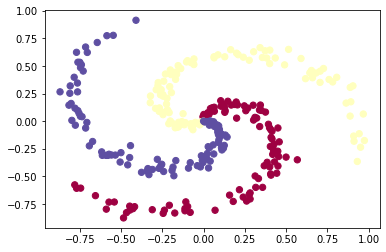

In [3]:
# 선형으로 분석할 수 없는 데이터를 생성
# 나선형 데이터 세트를 샘플로 생성함

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
  
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

# **Softmax 선형 분류기로 학습**

In [4]:
num_epoch = 10000

x = torch.from_numpy(X).type_as(torch.FloatTensor())
y_ = torch.from_numpy(y).type_as(torch.LongTensor())

print(x.size(), y_.size())

torch.Size([300, 2]) torch.Size([300])


In [5]:
model = nn.Sequential(
    nn.Linear(2, 20), 
    nn.ReLU(),
    nn.Linear(20, 10),
    nn.ReLU(),    
    nn.Linear(10, 5),
    nn.ReLU(),
    nn.Linear(5, 5),
    nn.ReLU(),
    nn.Linear(5, 3),
).cuda()

loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [6]:
label = y_.cuda()

for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(Variable(x.cuda()))
    loss = loss_func(output, Variable(label))
    loss.backward()
    optimizer.step()

    if i % 100 == 0:
        print(loss)

tensor(1.1744, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1045, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0504, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8788, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5262, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3979, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3327, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2747, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2349, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1953, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1611, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1378, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1203, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1065, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0953, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0861, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0783, device='cuda:0', grad_fn=